In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class IcoSphere():
    """Creates a sphere from an icosahedron.
    
    Each face is divided into 4 new triangles by changing the refinement order.
    i.e. a refinement_order of 0 (default) is just an icosahedron, by changing this
    to 1, each triangle will be split into 4.  By changing it to 2, each triangle will
    be subdivided, then subdivided again making a total of 16 new faces.      
    """
    origin=np.array([0, 0, 0])
    tau = 0.8506508083520400
    one = 0.5257311121191335
    
    pts = np.array([
        [-one,   tau, 0.0],
        [ one,   tau, 0.0],
        [-one,  -tau, 0.0],
        [ one,  -tau, 0.0],
        [0.0, -one,   tau],
        [0.0,  one,   tau],
        [0.0, -one,  -tau],
        [0.0,  one,  -tau],
        [  tau, 0.0, -one],
        [  tau, 0.0,  one],
        [ -tau, 0.0, -one],
        [ -tau, 0.0,  one],
    ], dtype=float)
    faces = np.array([
        [0, 11, 5],
        [0, 5, 1],
        [0, 1, 7],
        [0, 7, 10],
        [0, 10, 11],
        [1, 5, 9],
        [5, 11, 4],
        [11, 10, 2],
        [10, 7, 6],
        [7, 1, 8],
        [3, 9, 4],
        [3, 4, 2],
        [3, 2, 6],
        [3, 6, 8],
        [3, 8, 9],
        [4, 9, 5],
        [2, 4, 11],
        [6, 2, 10],
        [8, 6, 7],
        [9, 8, 1],
    ])

    refinement_order=0
    
    def change_refinement(self, nu_refinement_order):
        """Changes the refinement order for the sphere, the higher the number, the closer to a sphere."""
        self.refinement_order = nu_refinement_order
        faces = self.faces
        pts = self.pts
    
        for i in range(self.refinement_order):
    
            faces_old = faces
            delete_list=[]
            for face_index in range(len(faces_old)):
        
                face = faces_old[face_index]
                pts, faces, delete_list = self.MakeNewFace(faces, face_index, pts, self.origin, face, delete_list)

            faces = np.delete(faces, delete_list, 0)
        self.faces = faces
        self.pts = pts
    
    def getMidPoint(self, pts, face, origin):
        midway1 = (pts[int(face[0])]+pts[int(face[1])])/2
        midway2 = (pts[int(face[0])]+pts[int(face[2])])/2
        midway3 = (pts[int(face[1])]+pts[int(face[2])])/2

        midway = [midway1, midway2, midway3]
        nu_midway = []
        for nu_pt in range(3):
            distance=math.sqrt(sum((midway[nu_pt]-origin)**2))
            nu_midway.append(midway[nu_pt]/distance)

        return nu_midway

    def MakeNewFace(self, faces, face_index, pts, origin, face, delete_list):
        ind1 = pts[int(face[0])]
        ind2 = pts[int(face[1])]
        ind3 = pts[int(face[2])]

        ind=np.array([ind1, ind2, ind3])

        #Returns the midpoint on the unit sphere
        nu_pts=np.array(self.getMidPoint(pts, face, origin)).reshape(-1, 3)

        #Finds if the new points are already in the 'points' array
        counter=0
        inds=np.zeros(3)

        for nu_pt in nu_pts:
            pt_counter=0
            added=False
            for pt in pts:
                if nu_pt[0] == pt[0] and nu_pt[1] == pt[1] and nu_pt[2] == pt[2]:
                    inds[counter] = pt_counter
                    addes=True
                pt_counter+=1
            if added!=True:
                inds[counter] = faces.max()+counter+1
            counter+=1

        pts = np.append(pts, nu_pts).reshape(-1,3)

        pt1 = face[0]
        pt2 = face[1]
        pt3 = face[2]
        pt4 = inds[0]
        pt5 = inds[1]
        pt6 = inds[2]

        nu_faces = []
        nu_faces = np.array([
            [pt2, pt4, pt6],
            [pt4, pt1, pt5],
            [pt3, pt6, pt5],
            [pt4, pt5, pt6]])

        delete_list.append(face_index)

        faces = np.append(faces, nu_faces).reshape(-1, 3)

        return pts, faces, delete_list

In [3]:
def plotIco(pts, faces):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(pts[:,0], pts[:,1], pts[:,2], triangles=faces)

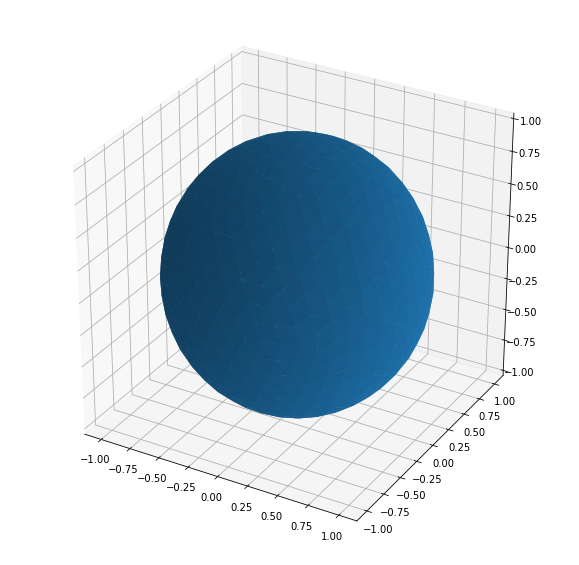

In [5]:
x = IcoSphere()
x.change_refinement(3)

plotIco(x.pts, x.faces)